# Homework#4 - Q1
### CIS9655<br>Hojin Lee

### Cleaning data

Use trips.csv to answer this question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trip = pd.read_csv("/Users/hojin/Desktop/2021Fall/CIS9655-DataVisualization/Homework/HW4/trips.csv")
trip.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [3]:
trip.shape

(100000, 19)

In [4]:
trip.isnull().sum().sort_values(ascending=False)

Unnamed: 0               0
payment_type             0
total_amount             0
improvement_surcharge    0
tolls_amount             0
tip_amount               0
mta_tax                  0
extra                    0
fare_amount              0
DOLocationID             0
VendorID                 0
PULocationID             0
store_and_fwd_flag       0
RatecodeID               0
trip_distance            0
passenger_count          0
tpep_dropoff_datetime    0
tpep_pickup_datetime     0
congestion_surcharge     0
dtype: int64

In [5]:
trip.duplicated().sum()

0

Dropping an unneccesay column "Unnamed: 0"

In [6]:
trip.drop(columns=["Unnamed: 0"], inplace=True)

You need to clean data following these two rules:<br>
### 1) no amounts should be negative like tip, distance etc. (refer to data dictionary PDF file for definitions of each column if needed).

Checking the number of negative amounts

In [7]:
trip.select_dtypes(include=['float64', 'int64']).columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [8]:
num_df = ['passenger_count', 'trip_distance','payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge']

In [9]:
trip[(trip[num_df] < 0).all(axis=1)].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge


In [10]:
trip.shape

(100000, 18)

In [11]:
trip = trip[(trip[num_df] >= 0).all(axis=1)]
trip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [12]:
trip.shape

(99570, 18)

### 2) Passenger count should not exceed six. Use Seaborne for visualization.

Checking the number of passenger_counts which exceed 6

In [14]:
sorted(trip["passenger_count"].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [15]:
trip[(trip["passenger_count"] > 6)].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
33432,2.0,2020-01-01 02:25:50,2020-01-01 02:26:47,8.0,1.21,5.0,N,140,262,2.0,88.88,0.0,0.0,0.00,0.0,0.3,91.68,2.5
42270,2.0,2020-01-01 03:01:46,2020-01-01 03:01:49,8.0,0.00,5.0,N,48,48,1.0,8.30,0.0,0.5,1.82,0.0,0.3,10.92,0.0
50523,1.0,2020-01-01 03:53:38,2020-01-01 03:58:57,8.0,1.00,1.0,N,231,79,1.0,5.50,3.0,0.5,1.00,0.0,0.3,10.30,2.5
54229,2.0,2020-01-01 04:35:19,2020-01-01 04:35:23,8.0,0.00,5.0,N,265,265,1.0,80.00,0.0,0.5,10.88,0.0,0.3,91.68,0.0
66936,2.0,2020-01-01 08:20:18,2020-01-01 08:20:28,7.0,0.00,5.0,N,132,264,1.0,70.00,0.0,0.0,0.00,0.0,0.3,70.30,0.0


In [16]:
trip.shape

(99570, 18)

In [17]:
trip = trip[trip["passenger_count"] <= 6]
trip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [19]:
sorted(trip["passenger_count"].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [20]:
trip.shape

(99563, 18)

Use Seaborne for visualization.
### a. Show the distribution of pick up and drop off hours of the day divided into three time zones, <br>- late night (22:00 to 04:00),<br> - morning (04:00 to 10:00) <br>- midday (10:00 to 16:00). 15 points

In [21]:
import datetime
from datetime import datetime
from datetime import time

In [22]:
trip["tpep_pickup_datetime"] = pd.to_datetime(trip["tpep_pickup_datetime"])
trip["tpep_dropoff_datetime"] = pd.to_datetime(trip["tpep_dropoff_datetime"])
trip["pickup_hr"] = trip["tpep_pickup_datetime"].dt.hour 
trip["dropoff_hr"] = trip["tpep_dropoff_datetime"].dt.hour

In [24]:
trip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hr,dropoff_hr
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0,0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0,0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0,0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0,1
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0,0


In [26]:
trip["pickup_hr"] = trip["tpep_pickup_datetime"].dt.hour 
trip["dropoff_hr"] = trip["tpep_dropoff_datetime"].dt.hour

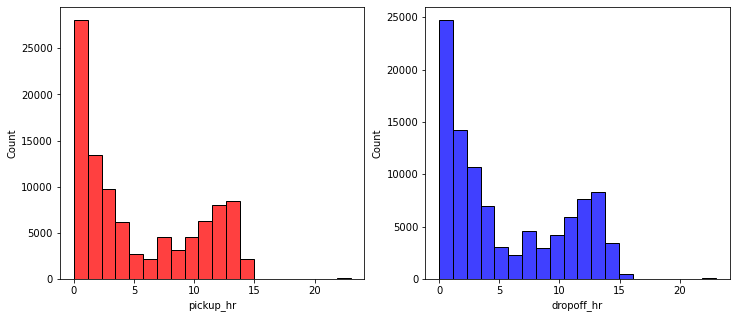

In [27]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(trip, x=trip["pickup_hr"], color = "red", bins = 20, ax=ax[0])
sns.histplot(trip, x=trip["dropoff_hr"], color="blue", bins = 20, ax=ax[1])
plt.show()

### a1) late night (22:00 to 04:00)

In [28]:
pickup_late = trip[(trip["pickup_hr"] >= 22) | (trip["pickup_hr"] <= 4)]
sorted(pickup_late.pickup_hr.unique())

[0, 1, 2, 3, 4, 22, 23]

In [29]:
dropoff_late = trip[(trip["dropoff_hr"] >= 22) | (trip["dropoff_hr"] <= 4)]
sorted(dropoff_late.dropoff_hr.unique())

[0, 1, 2, 3, 4, 22, 23]

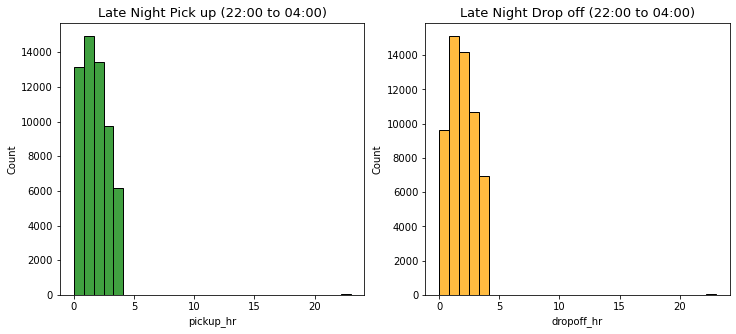

In [30]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(pickup_late, x="pickup_hr", ax=ax[0], bins=28, color = "green")
ax[0].set_title("Late Night Pick up (22:00 to 04:00)", fontsize=13)
sns.histplot(dropoff_late, x="dropoff_hr", ax=ax[1], bins=28, color = "orange")
ax[1].set_title("Late Night Drop off (22:00 to 04:00)", fontsize=13)
plt.show()

### a2) morning (04:00 to 10:00)

In [31]:
pickup_morning = trip[(trip["pickup_hr"] >= 4) & (trip["pickup_hr"] <= 10)]
sorted(pickup_morning.pickup_hr.unique())

[4, 5, 6, 7, 8, 9, 10]

In [32]:
dropoff_morning = trip[(trip["dropoff_hr"] >= 4) & (trip["dropoff_hr"] <= 10)]
sorted(dropoff_morning.dropoff_hr.unique())

[4, 5, 6, 7, 8, 9, 10]

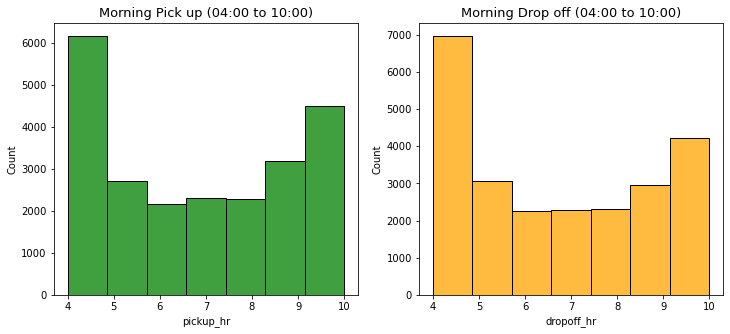

In [33]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(pickup_morning, x="pickup_hr", bins=7, ax=ax[0], color = "green")
ax[0].set_title("Morning Pick up (04:00 to 10:00)", fontsize=13)
sns.histplot(dropoff_morning, x="dropoff_hr", bins=7, ax=ax[1], color = "orange")
ax[1].set_title("Morning Drop off (04:00 to 10:00)", fontsize=13)
plt.show()

### a3) midday (10:00 to 16:00).

In [34]:
pickup_mid = trip[(trip["pickup_hr"] >= 10) & (trip["pickup_hr"] <= 16)]
sorted(pickup_mid.pickup_hr.unique())

[10, 11, 12, 13, 14, 15, 16]

In [35]:
dropoff_mid = trip[(trip["dropoff_hr"] >= 10) & (trip["dropoff_hr"] <= 16)]
sorted(dropoff_mid.dropoff_hr.unique())

[10, 11, 12, 13, 14, 15, 16]

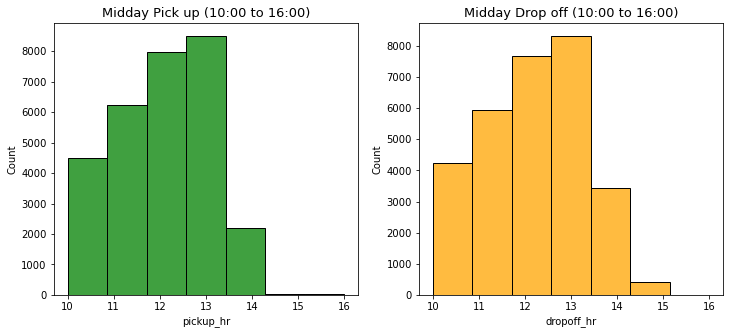

In [36]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(pickup_mid, x="pickup_hr", bins=7, ax=ax[0], color = "green")
ax[0].set_title("Midday Pick up (10:00 to 16:00)", fontsize=13)
sns.histplot(dropoff_mid, x="dropoff_hr", bins=7, ax=ax[1], color = "orange")
ax[1].set_title("Midday Drop off (10:00 to 16:00)", fontsize=13)
plt.show()

### b. Create a pie chart for different passenger counts showing number of trips for each. 10 points<br>


In [37]:
passenger_df = trip.groupby('passenger_count')['VendorID'].count().reset_index()
passenger_df.rename(columns={'VendorID':'Number of Trips'}, inplace=True)
passenger_df

,passenger_count,Number of Trips
0,0.0,1563
1,1.0,63726
2,2.0,19341
3,3.0,5589
4,4.0,3308
5,5.0,3901
6,6.0,2135


In [38]:
sorted(passenger_df["passenger_count"].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

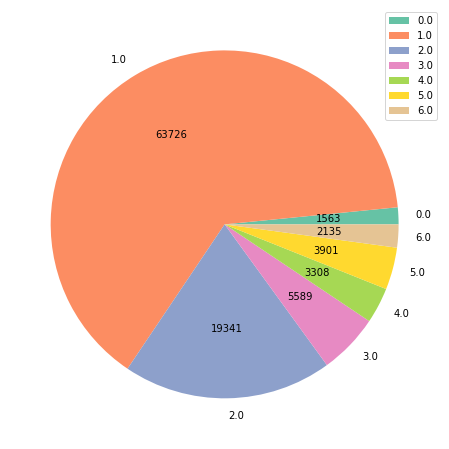

In [39]:
colors = sns.color_palette("Set2",7)

total = sum(passenger_df["Number of Trips"])

plt.figure(figsize=(8,8))
plt.pie(passenger_df["Number of Trips"],
       labels = passenger_df["passenger_count"],
        autopct = lambda p: '{:.0f}'.format(p * total / 100),
        colors=colors)
plt.legend(loc="upper right")
plt.show()


### c. Show a scatter plot of trip distance vs fare amount. 10 points<br>

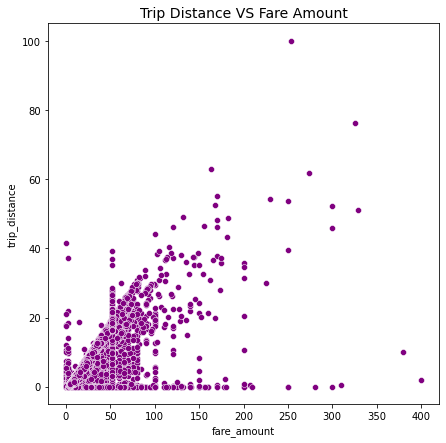

In [40]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=trip, y="trip_distance", x="fare_amount", color = "purple")
plt.title("Trip Distance VS Fare Amount", size=14)
plt.show()